# TP4 Réalisé par Rim Ben Abdeljelil - Souha Khanchel

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from keras.layers import Embedding , GRU
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import GlobalMaxPooling1D, MaxPooling1D

In [2]:
movie_reviews = pd.read_csv('IMDB Dataset.csv')
print('Dataframe shape: ', movie_reviews.shape)

Dataframe shape:  (50000, 2)


In [3]:
print(movie_reviews.isnull().sum())

review       0
sentiment    0
dtype: int64


In [4]:
print(movie_reviews.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


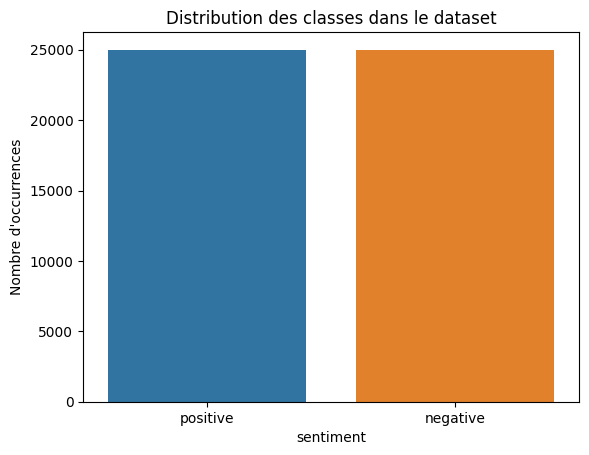

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compter le nombre d'occurrences de chaque classe
counts = movie_reviews['sentiment'].value_counts()

# Tracer un graphique à barres pour chaque classe
sns.countplot(x='sentiment', data=movie_reviews)

plt.xlabel('sentiment')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des classes dans le dataset')

# Afficher le graphique
plt.show()

In [6]:
print("4ème revue :\n", movie_reviews['review'][3])

# Imprimer la valeur de sentiment correspondante
print("Sentiment de la 4ème revue :", movie_reviews['sentiment'][3])

4ème revue :
 Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
Sentiment de la 4ème revue : negative


In [4]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [5]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [6]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [8]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [9]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [10]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [233]:
X_train

array([[   4,    1,  296, ...,  198,  345, 3812],
       [   1,  412,  100, ...,   82,   99,    6],
       [ 128, 1307,  108, ...,    0,    0,    0],
       ...,
       [ 778,    8,   24, ...,    0,    0,    0],
       [   8,  347,   10, ...,    0,    0,    0],
       [ 274,  100,  121, ...,   67,   69, 1946]])

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:],dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [18]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# A. Classification with a simple neural network

In [210]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Créer un modèle séquentiel
Neural = Sequential()

Neural.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# Ajouter une couche de Flatten
Neural.add(Flatten())

# Ajouter une couche Dense
Neural.add(Dense(units=1, activation='sigmoid'))

# Compiler le modèle avec les paramètres spécifiés
Neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Entraîner le modèle avec les paramètres spécifiés
history = Neural.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.5996 - acc: 0.6722 - val_loss: 0.5334 - val_acc: 0.7308
Epoch 2/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4934 - acc: 0.7631 - val_loss: 0.5402 - val_acc: 0.7278
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4593 - acc: 0.7862 - val_loss: 0.5250 - val_acc: 0.7380
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4409 - acc: 0.7977 - val_loss: 0.5251 - val_acc: 0.7411
Epoch 5/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4167 - acc: 0.8110 - val_loss: 0.5370 - val_acc: 0.7411
Epoch 6/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4093 - acc: 0.8147 - val_loss: 0.5428 - val_acc: 0.7364


In [211]:
score = Neural.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5444 - acc: 0.7380
Test Score: 0.5443859100341797
Test Accuracy: 0.7379999756813049


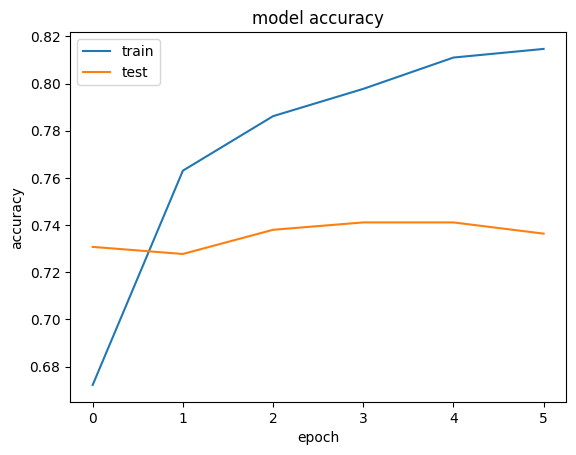

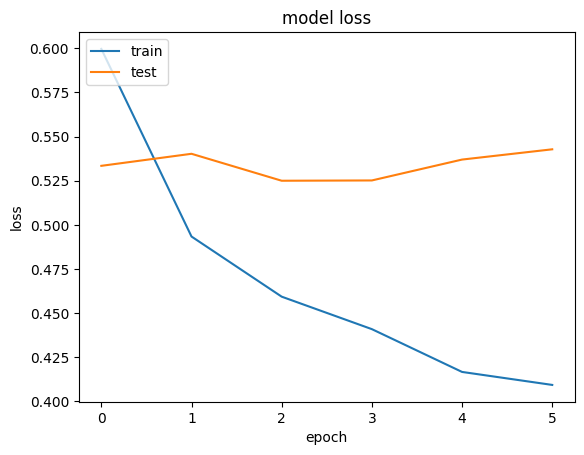

In [212]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [213]:
len(y_train)

40000

In [214]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [27]:
print(X_test.shape)
print(y_test.shape)


(10000, 100)
(10000,)


# B. Classification with a convolutional neural network

In [216]:
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense

#y_train = to_categorical(y_train)

CNN = Sequential()
CNN.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
CNN.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
CNN.add(MaxPooling1D())
CNN.add(Dense(units=1, activation='sigmoid'))

CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history1 = CNN.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/6
250/250 [==============================] - 46s 183ms/step - loss: 0.6632 - acc: 0.5969 - val_loss: 0.6376 - val_acc: 0.6253
Epoch 2/6
250/250 [==============================] - 45s 180ms/step - loss: 0.6295 - acc: 0.6352 - val_loss: 0.6364 - val_acc: 0.6263
Epoch 3/6
250/250 [==============================] - 47s 190ms/step - loss: 0.6203 - acc: 0.6443 - val_loss: 0.6358 - val_acc: 0.6275
Epoch 4/6
250/250 [==============================] - 53s 210ms/step - loss: 0.6153 - acc: 0.6495 - val_loss: 0.6219 - val_acc: 0.6428
Epoch 5/6
250/250 [==============================] - 46s 186ms/step - loss: 0.6112 - acc: 0.6535 - val_loss: 0.6214 - val_acc: 0.6432
Epoch 6/6
250/250 [==============================] - 48s 192ms/step - loss: 0.6069 - acc: 0.6573 - val_loss: 0.6256 - val_acc: 0.6382


In [217]:
score = CNN.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.6255 - acc: 0.6388
Test Score: 0.6254530549049377
Test Accuracy: 0.6388457417488098


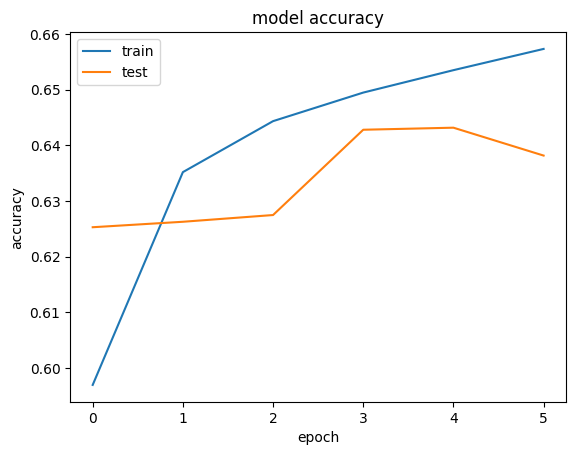

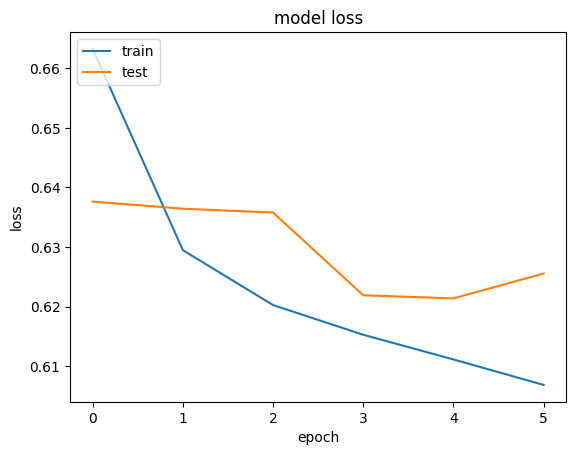

In [218]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Classification with LSTM

In [220]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

RNN = Sequential()
RNN.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
RNN.add(LSTM(units=128))
RNN.add(Dense(units=1, activation='sigmoid'))

RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history2 = RNN.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/6
250/250 [==============================] - 75s 291ms/step - loss: 0.4975 - acc: 0.7507 - val_loss: 0.3801 - val_acc: 0.8356
Epoch 2/6
250/250 [==============================] - 71s 284ms/step - loss: 0.3343 - acc: 0.8562 - val_loss: 0.3954 - val_acc: 0.8530
Epoch 3/6
250/250 [==============================] - 69s 278ms/step - loss: 0.2859 - acc: 0.8808 - val_loss: 0.3165 - val_acc: 0.8634
Epoch 4/6
250/250 [==============================] - 68s 272ms/step - loss: 0.2543 - acc: 0.8983 - val_loss: 0.3157 - val_acc: 0.8646
Epoch 5/6
250/250 [==============================] - 69s 277ms/step - loss: 0.2311 - acc: 0.9089 - val_loss: 0.3289 - val_acc: 0.8644
Epoch 6/6
250/250 [==============================] - 72s 287ms/step - loss: 0.2082 - acc: 0.9195 - val_loss: 0.3379 - val_acc: 0.8579


In [221]:
score = RNN.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 7s 24ms/step - loss: 0.3235 - acc: 0.8642
Test Score: 0.3234810531139374
Test Accuracy: 0.8641999959945679


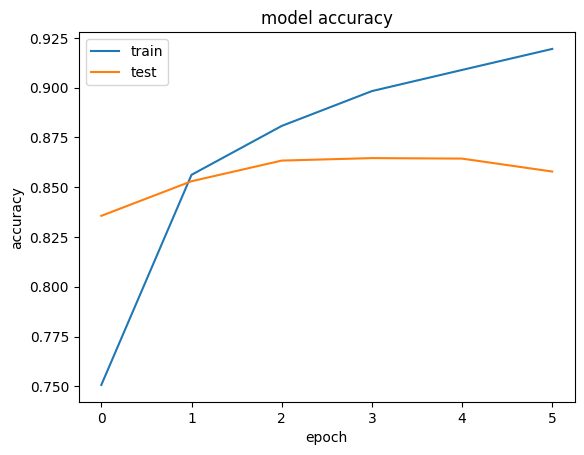

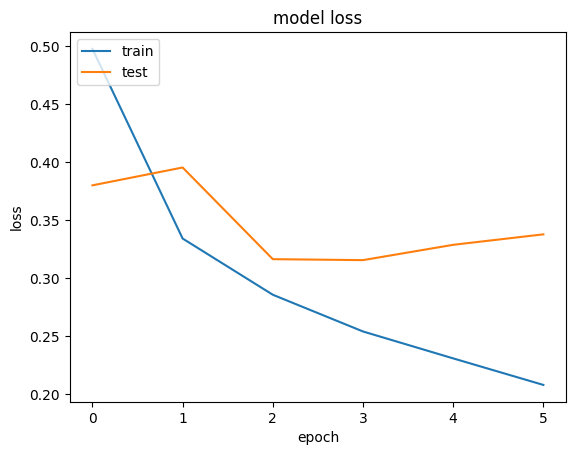

In [222]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [225]:
score1 = Neural.evaluate(X_test, y_test, verbose=1)
score2 = CNN.evaluate(X_test, y_test, verbose=1)
score3 = RNN.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 7s 23ms/step - loss: 0.3235 - acc: 0.8642


In [228]:
df_scores = pd.DataFrame({
    'Modèle': ['Neural Network', 'CNN','RNN'],
    'Accuracy': [score1[1], score2[1],score3[1]]
})
print(df_scores)

           Modèle  Accuracy
0  Neural Network  0.738000
1             CNN  0.638846
2             RNN  0.864200


In [237]:
inst = X[20]
print(inst)

After the success of Die Hard and it sequels it no surprise really that in the a glut of Die Hard on movies cashed in on the wrong guy wrong place wrong time concept That is what they did with Cliffhanger Die Hard on mountain just in time to rescue Sly Stop or My Mom Will Shoot Stallone career Cliffhanger is one big nit pickers dream especially to those who are expert at mountain climbing base jumping aviation facial expressions acting skills All in all it full of excuses to dismiss the film as one overblown pile of junk Stallone even managed to get out acted by horse However if you an forget all the nonsense it actually very lovable and undeniably entertaining romp that delivers as plenty of thrills and unintentionally plenty of laughs You ve got to love John Lithgows sneery evilness his tick every box band of baddies and best of all the permanently harassed and hapless turncoat agent Rex Linn as Travers He may of been Henry in Portrait of Serial Killer but Michael Rooker is noteworth

In [238]:
y[20]

1

In [ ]:
inst = tokenizer.texts_to_sequences(inst)
list = []
for sublist in instance:
    for item in sublist:
        list.append(item)
list = [list]
inst = pad_sequences(list, padding='post', maxlen=maxlen)

prediction = RNN.predict(inst)

if(prediction>0.5):
    print('The instance is positive')
else: print('the instance is negative')

 # Compte Rendu

In [11]:
def train_and_evaluate_LTSM_model(embedding_matrix_method,embedding_dim=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_method], input_length=maxlen))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)
    score = model.evaluate(X_test, y_test, verbose=1)
    return score[1]

In [12]:
def train_and_evaluate_GRU_model(embedding_matrix_method, embedding_dim=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_method], input_length=maxlen))
    model.add(GRU(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.2)
    score= model.evaluate(X_test, y_test)
    return score[1]

In [13]:
def train_and_evaluate_RNN_CNN_model(embedding_matrix_method, embedding_dim=100):
    # define the model
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_method], input_length=maxlen, trainable=False))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(units=128))
    model.add(Dense(units=1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # train the model
    history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2, )

    # evaluate the model on the test set
    score= model.evaluate(X_test, y_test)
    return score[1]

In [19]:
embedding_matrix_glove = embedding_matrix
embedding_dim_glove = 100

# Word2Vec

In [14]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=X, window=5, min_count=1)

In [15]:
embedding_matrix_w2v = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in enumerate(w2v_model.wv.key_to_index):
        embedding_matrix_w2v[i] = w2v_model[word]

# FastText

In [22]:
from gensim.models import FastText
fasttext_model= FastText(sentences=X, min_count=1 , window=5)

In [23]:
embedding_matrix_fasttext = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = fasttext_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector

# TfIdf

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(X)

TfidfVectorizer()

In [30]:
vocab = tfidf.get_feature_names_out() 
idf = tfidf.idf_
embedding_matrix_tfidf = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in vocab:
        word_index = np.where(vocab == word)[0][0]
        tfidf_weight = idf[word_index]
        #tfidf_weight = idf[vocab.index(word)]
        embedding_matrix_tfidf[i] = tfidf.transform([word]).toarray()[0][:100] * tfidf_weight

# EVALUATING

In [20]:
tableau_comparatif=pd.DataFrame()
tableau_comparatif.index = ['LSTM', 'GRU', 'RNN + CNN']
tableau_comparatif['Glove']= [train_and_evaluate_LTSM_model(embedding_matrix_glove), train_and_evaluate_GRU_model(embedding_matrix_glove),  train_and_evaluate_RNN_CNN_model(embedding_matrix_glove)]
tableau_comparatif

Epoch 1/6
250/250 [==============================] - 93s 366ms/step - loss: 0.5031 - acc: 0.7461 - val_loss: 0.3689 - val_acc: 0.8405
Epoch 2/6
250/250 [==============================] - 87s 349ms/step - loss: 0.3392 - acc: 0.8574 - val_loss: 0.3205 - val_acc: 0.8648
Epoch 3/6
250/250 [==============================] - 96s 383ms/step - loss: 0.2859 - acc: 0.8844 - val_loss: 0.3218 - val_acc: 0.8618
Epoch 4/6
250/250 [==============================] - 70s 280ms/step - loss: 0.2597 - acc: 0.8969 - val_loss: 0.3161 - val_acc: 0.8687
Epoch 5/6
250/250 [==============================] - 67s 268ms/step - loss: 0.2376 - acc: 0.9064 - val_loss: 0.3250 - val_acc: 0.8659
Epoch 6/6
313/313 [==============================] - 7s 23ms/step - loss: 0.3297 - acc: 0.8626
Epoch 1/6
250/250 [==============================] - 45s 175ms/step - loss: 0.5459 - acc: 0.6983 - val_loss: 0.3743 - val_acc: 0.8354
Epoch 2/6
250/250 [==============================] - 43s 171ms/step - loss: 0.3214 - acc: 0.8630 - va

,Glove
LSTM,0.8626
GRU,0.8661
RNN + CNN,0.8335


In [21]:
tableau_comparatif['Word2vec']=[train_and_evaluate_LTSM_model(embedding_matrix_w2v), train_and_evaluate_GRU_model(embedding_matrix_w2v),  train_and_evaluate_RNN_CNN_model(embedding_matrix_w2v)]

Epoch 1/6
250/250 [==============================] - 70s 273ms/step - loss: 0.4096 - acc: 0.8078 - val_loss: 0.3379 - val_acc: 0.8547
Epoch 2/6
250/250 [==============================] - 66s 265ms/step - loss: 0.2978 - acc: 0.8778 - val_loss: 0.3440 - val_acc: 0.8499
Epoch 3/6
250/250 [==============================] - 66s 265ms/step - loss: 0.2635 - acc: 0.8946 - val_loss: 0.3702 - val_acc: 0.8497
Epoch 4/6
250/250 [==============================] - 67s 269ms/step - loss: 0.2298 - acc: 0.9083 - val_loss: 0.3698 - val_acc: 0.8459
Epoch 5/6
250/250 [==============================] - 68s 273ms/step - loss: 0.2057 - acc: 0.9195 - val_loss: 0.4254 - val_acc: 0.8424
Epoch 6/6
313/313 [==============================] - 8s 24ms/step - loss: 0.4037 - acc: 0.8400
Epoch 1/6
250/250 [==============================] - 45s 163ms/step - loss: 0.4623 - acc: 0.7683 - val_loss: 0.3505 - val_acc: 0.8471
Epoch 2/6
250/250 [==============================] - 40s 161ms/step - loss: 0.3098 - acc: 0.8739 - va

In [24]:
tableau_comparatif['Fasttext']=[train_and_evaluate_LTSM_model(embedding_matrix_fasttext), train_and_evaluate_GRU_model(embedding_matrix_fasttext),  train_and_evaluate_RNN_CNN_model(embedding_matrix_fasttext)]
tableau_comparatif

Epoch 1/6
250/250 [==============================] - 71s 278ms/step - loss: 0.4172 - acc: 0.8045 - val_loss: 0.3468 - val_acc: 0.8528
Epoch 2/6
250/250 [==============================] - 68s 272ms/step - loss: 0.2990 - acc: 0.8799 - val_loss: 0.3568 - val_acc: 0.8470
Epoch 3/6
250/250 [==============================] - 69s 277ms/step - loss: 0.2607 - acc: 0.8946 - val_loss: 0.3454 - val_acc: 0.8545
Epoch 4/6
250/250 [==============================] - 75s 301ms/step - loss: 0.2312 - acc: 0.9092 - val_loss: 0.3658 - val_acc: 0.8508
Epoch 5/6
250/250 [==============================] - 73s 290ms/step - loss: 0.2006 - acc: 0.9228 - val_loss: 0.4670 - val_acc: 0.8391
Epoch 6/6
313/313 [==============================] - 9s 28ms/step - loss: 0.4109 - acc: 0.8473
Epoch 1/6
250/250 [==============================] - 42s 162ms/step - loss: 0.4676 - acc: 0.7640 - val_loss: 0.3439 - val_acc: 0.8522
Epoch 2/6
250/250 [==============================] - 41s 164ms/step - loss: 0.3001 - acc: 0.8752 - va

,Glove,Word2vec,Fasttext
LSTM,0.8626,0.8400,0.8473
GRU,0.8661,0.8516,0.8555
RNN + CNN,0.8335,0.5039,0.6072


In [31]:
tableau_comparatif['Tf-idf']=[train_and_evaluate_LTSM_model(embedding_matrix_tfidf), train_and_evaluate_GRU_model(embedding_matrix_tfidf),  train_and_evaluate_RNN_CNN_model(embedding_matrix_tfidf)]
tableau_comparatif

Epoch 1/6
250/250 [==============================] - 79s 305ms/step - loss: 0.4124 - acc: 0.8071 - val_loss: 0.3630 - val_acc: 0.8470
Epoch 2/6
250/250 [==============================] - 73s 292ms/step - loss: 0.2993 - acc: 0.8765 - val_loss: 0.3546 - val_acc: 0.8509
Epoch 3/6
250/250 [==============================] - 76s 303ms/step - loss: 0.2620 - acc: 0.8941 - val_loss: 0.3518 - val_acc: 0.8510
Epoch 4/6
250/250 [==============================] - 73s 291ms/step - loss: 0.2249 - acc: 0.9119 - val_loss: 0.3964 - val_acc: 0.8482
Epoch 5/6
250/250 [==============================] - 72s 288ms/step - loss: 0.2048 - acc: 0.9196 - val_loss: 0.4040 - val_acc: 0.8447
Epoch 6/6
313/313 [==============================] - 9s 28ms/step - loss: 0.4454 - acc: 0.8372
Epoch 1/6
250/250 [==============================] - 43s 167ms/step - loss: 0.4554 - acc: 0.7726 - val_loss: 0.3547 - val_acc: 0.8447
Epoch 2/6
250/250 [==============================] - 43s 170ms/step - loss: 0.2987 - acc: 0.8781 - va

,Glove,Word2vec,Fasttext,Tf-idf
LSTM,0.8626,0.8400,0.8473,0.8372
GRU,0.8661,0.8516,0.8555,0.8513
RNN + CNN,0.8335,0.5039,0.6072,0.4961
